# Deep learning in genomics - Basic model with PyTorch

This notebook is based on the [jupyter notebook](https://nbviewer.jupyter.org/github/abidlabs/deep-learning-genomics-primer/blob/master/A_Primer_on_Deep_Learning_in_Genomics_Public.ipynb) from the publication ["A primer on deep learning in genomics"](https://www.nature.com/articles/s41588-018-0295-5) but uses the [PyTorch](https://pytorch.org) library.

# Notebook setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [4]:
import pdb

In [5]:
# fastai version
__version__

'1.0.39.dev0'

# Data setup

## Load data from the web, generate dataframe, and save to disk

In [200]:
!pwd

/Users/MMP/Downloads/genomics


In [205]:
!ls /Volumes/HDD08/ugenomfit/data/*.fastq

/Volumes/HDD08/ugenomfit/data/SRR1993099.sra_1.fastq
/Volumes/HDD08/ugenomfit/data/SRR1993099.sra_2.fastq
/Volumes/HDD08/ugenomfit/data/SRR5665975.sra_1.fastq
/Volumes/HDD08/ugenomfit/data/SRR5665975.sra_2.fastq


In [206]:
PATH_raw_data = Path('/Volumes/HDD08/ugenomfit/data/'); PATH_raw_data

PosixPath('/Volumes/HDD08/ugenomfit/data')

In [208]:
from Bio import SeqIO

In [212]:
for file in (PATH_raw_data).glob('*.fastq'):
    for i, record in enumerate(SeqIO.parse(file, 'fastq')):
        print("%s %i" % (record.id, len(record)))
        if i == 100: continue

SRR1993099.sra.1 100
SRR1993099.sra.1 100
SRR5665975.sra.1 301
SRR5665975.sra.1 301


In [214]:
type(record)

Bio.SeqRecord.SeqRecord

In [213]:
record

SeqRecord(seq=Seq('CATATTTCCACCGCATACCTTATTGTTTTTTTCTGTTCTTCCTGTATGTCCTTC...TTT', SingleLetterAlphabet()), id='SRR5665975.sra.1', name='SRR5665975.sra.1', description='SRR5665975.sra.1 1 length=301', dbxrefs=[])

In [211]:
len(record)

301

In [216]:
#dir(record)

In [261]:
record.id

'SRR5665975.sra.1'

In [217]:
record.letter_annotations

{'phred_quality': [12,
  12,
  11,
  11,
  23,
  11,
  11,
  27,
  21,
  12,
  26,
  26,
  10,
  21,
  10,
  23,
  11,
  21,
  11,
  27,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  26,
  11,
  10,
  10,
  21,
  27,
  11,
  11,
  11,
  21,
  27,
  34,
  34,
  27,
  36,
  11,
  26,
  11,
  27,
  11,
  27,
  34,
  11,
  27,
  34,
  31,
  11,
  11,
  27,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  27,
  11,
  11,
  11,
  11,
  26,
  11,
  26,
  11,
  27,
  11,
  27,
  24,
  34,
  11,
  27,
  11,
  24,
  21,
  11,
  27,
  24,
  11,
  11,
  27,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  24,
  19,
  11,
  11,
  11,
  11,
  11,
  11,
  25,
  20,
  32,
  11,
  24,
  11,
  20,
  20,
  24,
  11,
  11,
  19,
  11,
  11,
  11,
  25,
  25,
  20,
  24,
  11,
  11,
  11,
  19,
  11,
  11,
  11,
  20,
  20,
  24,
  24,
  11,
  24,
  11,
  11,
  24,
  10,
  11,
  24,
  19,
  31,
  19,
  11,
  19,
  11,
  24,
  11,
  10,
  19,
  11,
  19,
  24,
  11,
  11,
  24,
  11,
  11,
  11,
  19,
  11,

In [265]:
def get_seqs(path):
    label, seq, score = [], [], []
    for n, fn in enumerate((path).glob('*.fastq')):
        print(n)
        # print n, genome number = label, and fn = filename
        #print(n, re.findall('\d+', str(fn)), fn)
        
        # append sequences
        for m, record in enumerate(SeqIO.parse(fn, 'fastq')):
            print(m)
            # append sequences
            seq.append(str(record.seq))
            score.append(record.letter_annotations['phred_quality'])
            
            # print genome name including contig number and sequence length
            #print("%s %i" % (record.id, len(record)))
        
            # append genome labels
            label.append(str(record.id))
            #pdb.set_trace() # start debugger
            
            if m == 5: break # only read in the first 100 sequences per fastq file
            
        
        # break loop
        #if n == 1: break
    return label, seq, score

In [266]:
label, seq, score = get_seqs(PATH_raw_data)

0
0
1
2
3
4
5
1
0
1
2
3
4
5
2
0
1
2
3
4
5
3
0
1
2
3
4
5


In [267]:
label

['SRR1993099.sra.1',
 'SRR1993099.sra.2',
 'SRR1993099.sra.3',
 'SRR1993099.sra.4',
 'SRR1993099.sra.5',
 'SRR1993099.sra.6',
 'SRR1993099.sra.1',
 'SRR1993099.sra.2',
 'SRR1993099.sra.3',
 'SRR1993099.sra.4',
 'SRR1993099.sra.5',
 'SRR1993099.sra.6',
 'SRR5665975.sra.1',
 'SRR5665975.sra.2',
 'SRR5665975.sra.3',
 'SRR5665975.sra.4',
 'SRR5665975.sra.5',
 'SRR5665975.sra.6',
 'SRR5665975.sra.1',
 'SRR5665975.sra.2',
 'SRR5665975.sra.3',
 'SRR5665975.sra.4',
 'SRR5665975.sra.5',
 'SRR5665975.sra.6']

In [268]:
#seq[-1][:100]

In [269]:
seq

['ATCTACAAGAAGGGTGAAGTGCTTTTCGAATTTTGCCACTGCAAGTAATTGGTGCAATTGAAATACGAGCTTTCGTTCTCTAAGAGGATATAAAAATAAG',
 'TGTGCTCCATGTCGATATTTCGTGGAGCAAACCAAAAAAGATGCGGAACCTCTTAGCACTCCGCCTGGACATAGGCGGAGCATATTCCTCCTATAGGATG',
 'NACCCTTTATAAAAGCCTAGATGTAGCAGTGCGAAGCGAACTCGATACTTGCTCATCATTGATTTCGGCATCTTTGTATAGAAAACTACAAATGTCTGAC',
 'CGAATGGGACCTTGAATGGATTAACGAGATTCCCACTGTCCCTATCTACTATCTAGCGAAACCACAGCCAAGGGAACGGGCTTGGCAGAATCAGTGGGGA',
 'CACACCGCAGTAGATGGAAAACTCGAGTTTTACATGGAACAGGTAAATAAATTTCCTCCAATCTTGTACCAATGGTTTTTAGAAAACTTTCCTGATCCAA',
 'TAGGGGTTTCATCGTAGTTTATGTTACACCATTTCAGAATCTCGTAGATGTTTTCTTCTGCTCTTTTTATTAGCTTCTTCTGGTTTGTATCTTCTAAACG',
 'GTCAATTCCTCTGCTTNGCTTTTCAAATCTGCTGAAGTAGCATCAGTGGAAAGTGTTATTGGGTAAACTTTACCAGAATGTCTAATATTGAACTCAAACG',
 'TTGATACACCTTTGGTNGGAATGTATGTCTCGCTAGAAACTGGAGAAGGCCGTCCTGAGGCCGGAAACCATCTCACCCTTAGGGAGGCAATCGGAGGGCC',
 'AGCTTAACGTCCAGCTTCAAGGAACGCACTAAACCTCTTGGCACAATGGTCCTAATCAACTTTCTCTCCTTCAAATCAGTAAACAGTGTTCCGTCAGACA',
 'TTTTCCACGTTCTAGCATTCAAGGTCCGCTTCATTGAATAAGTAAAGAAACTA

In [270]:
score

[[31,
  31,
  31,
  35,
  35,
  35,
  35,
  35,
  39,
  32,
  39,
  39,
  35,
  39,
  30,
  37,
  36,
  37,
  38,
  19,
  37,
  27,
  34,
  39,
  39,
  40,
  33,
  39,
  40,
  24,
  35,
  37,
  36,
  34,
  30,
  38,
  39,
  30,
  24,
  35,
  18,
  27,
  35,
  33,
  37,
  24,
  30,
  33,
  38,
  19,
  9,
  18,
  30,
  37,
  39,
  9,
  14,
  29,
  37,
  37,
  39,
  36,
  8,
  28,
  13,
  22,
  26,
  20,
  26,
  6,
  20,
  30,
  26,
  36,
  33,
  33,
  31,
  17,
  28,
  29,
  29,
  32,
  31,
  21,
  7,
  20,
  11,
  11,
  26,
  20,
  26,
  26,
  20,
  29,
  34,
  29,
  31,
  34,
  25,
  31],
 [34,
  34,
  31,
  37,
  37,
  37,
  37,
  37,
  38,
  39,
  38,
  37,
  39,
  39,
  38,
  40,
  24,
  37,
  39,
  39,
  36,
  36,
  33,
  38,
  39,
  36,
  39,
  40,
  39,
  40,
  33,
  38,
  39,
  40,
  40,
  40,
  38,
  33,
  38,
  39,
  39,
  40,
  40,
  39,
  40,
  40,
  36,
  40,
  39,
  40,
  39,
  39,
  39,
  37,
  36,
  31,
  31,
  33,
  35,
  35,
  37,
  36,
  34,
  34,
  33,
  29,
  33,
  

In [271]:
len(label), len(seq), len(score)

(24, 24, 24)

In [272]:
col_names = ['label', 'sequence', 'score']

In [273]:
fastq_df = pd.DataFrame({'label': label, 'sequence': seq, 'score': score})

In [277]:
fastq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
label       24 non-null object
sequence    24 non-null object
score       24 non-null object
dtypes: object(3)
memory usage: 656.0+ bytes


In [275]:
fastq_df.head()

,label,sequence,score
0,SRR1993099.sra.1,ATCTACAAGAAGGGTGAAGTGCTTTTCGAATTTTGCCACTGCAAGT...,"[31, 31, 31, 35, 35, 35, 35, 35, 39, 32, 39, 3..."
1,SRR1993099.sra.2,TGTGCTCCATGTCGATATTTCGTGGAGCAAACCAAAAAAGATGCGG...,"[34, 34, 31, 37, 37, 37, 37, 37, 38, 39, 38, 3..."
2,SRR1993099.sra.3,NACCCTTTATAAAAGCCTAGATGTAGCAGTGCGAAGCGAACTCGAT...,"[2, 16, 28, 35, 35, 37, 37, 37, 39, 38, 35, 38..."
3,SRR1993099.sra.4,CGAATGGGACCTTGAATGGATTAACGAGATTCCCACTGTCCCTATC...,"[31, 31, 31, 37, 37, 37, 37, 37, 37, 35, 39, 3..."
4,SRR1993099.sra.5,CACACCGCAGTAGATGGAAAACTCGAGTTTTACATGGAACAGGTAA...,"[34, 34, 34, 37, 37, 37, 37, 37, 39, 39, 39, 3..."


In [278]:
fastq_df.tail()

,label,sequence,score
19,SRR5665975.sra.2,CCAGGCATCAAATAAACCGATAGTCTCAGTCTAAAGACTGTCCCTT...,"[23, 23, 11, 11, 11, 24, 11, 26, 31, 12, 11, 1..."
20,SRR5665975.sra.3,GATAACCAGAACCACGGTTATTCCGTTTTTCTGACATCAATCTGTT...,"[12, 12, 23, 11, 11, 26, 26, 11, 11, 12, 11, 2..."
21,SRR5665975.sra.4,ACCCAAAGCCGTAACCATGACCACCCGCTATGGGCGTTGTCCAGTG...,"[12, 23, 32, 32, 11, 11, 11, 11, 21, 34, 10, 1..."
22,SRR5665975.sra.5,GCAGACGTTCTTGCGAATCCTGTATTTGGTCTTCTAGTCTTCGCGA...,"[12, 23, 11, 11, 11, 26, 10, 34, 11, 26, 34, 1..."
23,SRR5665975.sra.6,CACGCCATTTTTTTCCCATTCCCTACGTTTTAAAACTACGCCCAGT...,"[12, 12, 23, 11, 23, 25, 10, 11, 11, 12, 26, 2..."


In [279]:
# save to csv file
fastq_df.to_csv('fastq_df.csv')

## Data frame setup

In [280]:
# load csv file into pandas data frame
fastq_df = pd.read_csv('fastq_df.csv', index_col=0)

In [281]:
# show pandas data frame head
fastq_df.head()

,label,sequence,score
0,SRR1993099.sra.1,ATCTACAAGAAGGGTGAAGTGCTTTTCGAATTTTGCCACTGCAAGT...,"[31, 31, 31, 35, 35, 35, 35, 35, 39, 32, 39, 3..."
1,SRR1993099.sra.2,TGTGCTCCATGTCGATATTTCGTGGAGCAAACCAAAAAAGATGCGG...,"[34, 34, 31, 37, 37, 37, 37, 37, 38, 39, 38, 3..."
2,SRR1993099.sra.3,NACCCTTTATAAAAGCCTAGATGTAGCAGTGCGAAGCGAACTCGAT...,"[2, 16, 28, 35, 35, 37, 37, 37, 39, 38, 35, 38..."
3,SRR1993099.sra.4,CGAATGGGACCTTGAATGGATTAACGAGATTCCCACTGTCCCTATC...,"[31, 31, 31, 37, 37, 37, 37, 37, 37, 35, 39, 3..."
4,SRR1993099.sra.5,CACACCGCAGTAGATGGAAAACTCGAGTTTTACATGGAACAGGTAA...,"[34, 34, 34, 37, 37, 37, 37, 37, 39, 39, 39, 3..."


### Target variables setup

In [8]:
# setup target a
targA = seq_df['Target'].values; targA

array([0, 0, 0, 1, ..., 1, 0, 1, 1])

In [9]:
# setup target b = not(target a)
targB = np.logical_not(seq_df['Target'].values).astype(int); targB

array([1, 1, 1, 0, ..., 0, 1, 0, 0])

In [10]:
# zip together target a and target b to get target
targ = [[a,b] for a, b in zip(targA, targB)]; targ[:4], '...', targ[-4:]#, len(targ)

([[0, 1], [0, 1], [0, 1], [1, 0]], '...', [[1, 0], [0, 1], [1, 0], [1, 0]])

## Dataset setup for training with basic PyTorch

### Setup sqeuence to array function

#### Test 2D encoding of sequence

In [83]:
seq='CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGACACC'

In [86]:
    int_enc = LabelEncoder() # setup class instance to encode the four different bases to integer values (1D)
    one_hot_enc = OneHotEncoder(categories=[range(4)]) # setup one hot encoder to encode integer encoded classes (1D) to one hot encoded array (4D)
    
    enc = int_enc.fit_transform(list(seq)) # bases (ACGT) to int (0,1,2,3)
    enc = np.array(enc).reshape(-1,1) # reshape to get rank 2 array (from rank 1 array)
    #enc = one_hot_enc.fit_transform(enc) # encoded integer encoded bases to sparse matrix (sparse matrix dtype)
    #enc = enc.toarray().T # export sparse matrix to np array

In [90]:
seq[:10]

'CCGAGGGCTA'

In [89]:
enc[:10]

array([[1],
       [1],
       [2],
       [0],
       [2],
       [2],
       [2],
       [1],
       [3],
       [0]])

In [96]:
end = 10

In [121]:
adenosine = enc[:end] == 0
thymine = enc[:end] == 3

In [122]:
adenosine, thymine

(array([[False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True]]), array([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False]]))

In [136]:
basepair_enc = np.array([not(a or t) for a, t in zip(adenosine, thymine)]).astype('int') # base pair encoding: AT = False, GC = True

In [137]:
basepair_enc

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0])

In [138]:
cytosine = enc[:end] == 1

In [139]:
# strandpostion encodes the position of A/C or T/G on the the strand: A or C = False, T or G = True
strandposition_enc = np.array([not(a or c) for a, c in zip(adenosine, cytosine)]).astype('int')

In [140]:
strandposition_enc

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0])

In [144]:
np.stack((basepair_enc, strandposition_enc), axis=0)

array([[1, 1, 1, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 1, 1, 0, 1, 0]])

In [166]:
seq[:10]

'CCGAGGGCTA'

#### 2D encoding of sequence

In [145]:
# open sequence array function
def open_seq_array(seq:str)->np.array:
    "Return `List` object with np.array created from sequence string `seq`."
    
    int_enc = LabelEncoder() # setup class instance to encode the four different bases to integer values (1D)
    #one_hot_enc = OneHotEncoder(categories=[range(4)]) # setup one hot encoder to encode integer encoded classes (1D) to one hot encoded array (4D)
    
    enc = int_enc.fit_transform(list(seq)) # bases (ACGT) to int (0,1,2,3)
    enc = np.array(enc).reshape(-1,1) # reshape to get rank 2 array (from rank 1 array)
    #enc = one_hot_enc.fit_transform(enc) # encoded integer encoded bases to sparse matrix (sparse matrix dtype)
    #enc = enc.toarray().T#.reshape(1,-1,4) # export sparse matrix to np array
    
    # one-hot-encode base position
    adenosine = enc == 0
    thymine = enc == 3
    cytosine = enc == 1
    
    # base pair encoding: AT = False, GC = True
    # https://stackoverflow.com/questions/32192163/python-and-operator-on-two-boolean-lists-how
    basepair_enc = np.array([not(a or t) for a, t in zip(adenosine, thymine)]).astype('int')
    
    # strandpostion encodes the position of A/C or T/G on the the strand: A or C = False, T or G = True
    strandposition_enc = np.array([not(a or c) for a, c in zip(adenosine, cytosine)]).astype('int')
    
    enc = np.stack((basepair_enc, strandposition_enc), axis=0)
    
    return enc

In [146]:
# test open sequence function
test_arr = open_seq_array('CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGACACC'); test_arr, test_arr.shape

(array([[1, 1, 1, 0, ..., 1, 0, 1, 1],
        [0, 0, 1, 0, ..., 0, 0, 0, 0]]), (2, 50))

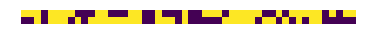

In [182]:
# visualize opened sequence as 2D image
plt.imshow(test_arr)
plt.axis('off');

In [197]:
test_ten = tensor(test_arr).type(torch.float); test_ten

tensor([[1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
         0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
         0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.],
        [0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
         0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
         1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.]])

In [198]:
# run test data through network
#net_basic(test_ten[None])

In [ ]:
# test to show image as RGB image with copied 2nd channel as 3rd channel

In [176]:
test_arr.reshape(2,50,1).shape, test_arr[-1].reshape(1,50,1).shape

((2, 50, 1), (1, 50, 1))

In [181]:
test_arr2 = np.concatenate((test_arr.reshape(2,50,1), test_arr[-1].reshape(1,50,1)))

In [184]:
test_arr2.shape

(3, 50, 1)

In [191]:
test_arr2.reshape(1,50,3)

array([[[1, 1, 1],
        [0, 1, 1],
        [1, 1, 0],
        [0, 0, 1],
        ...,
        [0, 1, 0],
        [1, 0, 1],
        [1, 0, 0],
        [0, 0, 0]]])

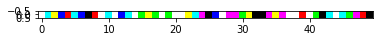

In [199]:
# visualize opened sequence as 2D image
# https://pillow.readthedocs.io/en/3.1.x/handbook/concepts.html#concept-modes
plt.imshow(test_arr2.reshape(1,50,3)*255)
#plt.axis('off');

#### 3D encoding of fastq sequence

In [289]:
# open sequence array function
def open_fastq_array(seq:str, score:list)->np.array:
    "Return `List` object with np.array created from sequence string `seq`."
    
    int_enc = LabelEncoder() # setup class instance to encode the four different bases to integer values (1D)
    #one_hot_enc = OneHotEncoder(categories=[range(4)]) # setup one hot encoder to encode integer encoded classes (1D) to one hot encoded array (4D)
    
    enc = int_enc.fit_transform(list(seq)) # bases (ACGT) to int (0,1,2,3)
    enc = np.array(enc).reshape(-1,1) # reshape to get rank 2 array (from rank 1 array)
    #enc = one_hot_enc.fit_transform(enc) # encoded integer encoded bases to sparse matrix (sparse matrix dtype)
    #enc = enc.toarray().T#.reshape(1,-1,4) # export sparse matrix to np array
    
    # one-hot-encode base position
    adenosine = enc == 0
    thymine = enc == 3
    cytosine = enc == 1
    
    # base pair encoding: AT = False, GC = True
    # https://stackoverflow.com/questions/32192163/python-and-operator-on-two-boolean-lists-how
    basepair_enc = np.array([not(a or t) for a, t in zip(adenosine, thymine)]).astype('int')*255
    
    # strandpostion encodes the position of A/C or T/G on the the strand: A or C = False, T or G = True
    strandposition_enc = np.array([not(a or c) for a, c in zip(adenosine, cytosine)]).astype('int')*255
    
    score_enc = np.array(score)
    
    enc = np.stack((basepair_enc, strandposition_enc, score_enc), axis=0)
    
    return enc

In [550]:
n = 15
test_fastq_arr = open_fastq_array(seq[n], np.multiply(score[n],1)); test_fastq_arr, test_fastq_arr.shape

(array([[  0,   0,   0,   0, ...,   0, 255,   0,   0],
        [255, 255,   0, 255, ...,   0, 255, 255, 255],
        [ 32,  34,  27,  34, ...,   9,   9,  17,  17]]), (3, 301))

In [551]:
print(seq[n])
print('\n')
print(score[n])

TTATTTTTCAGGCGTGCAGACGACGATGCAAACGCGTCCCGACCAGCAGAGCAATGACCAGCATCAGAGCAATAAATGCGCCGACGCCGTTCCAGCCTTAGTTATGCCAGAAAACACCACCCACCTTCCCGCCAATACTCCACCCCAGATAGTAACTTACCCGATACACCGTGTATGCCTGCCCTTTAGCTCGTTTTGCGCGGGGGCCGTTCCAGCTCCTGTCTACTGCGTTTTCTGCGTCTTCTCCTCCTTATACTCGTACCTTTCCGTCTACTTTCATCCCCCTCGTTCTTTTTTAGTT


[32, 34, 27, 34, 34, 37, 37, 38, 37, 24, 12, 12, 31, 22, 37, 22, 37, 31, 24, 11, 34, 10, 10, 23, 10, 10, 33, 11, 31, 11, 11, 11, 26, 11, 22, 10, 31, 31, 31, 31, 10, 11, 23, 31, 10, 11, 25, 11, 11, 11, 21, 36, 27, 11, 34, 11, 11, 25, 34, 11, 11, 24, 11, 34, 34, 11, 11, 11, 11, 24, 11, 11, 25, 11, 11, 11, 34, 11, 27, 10, 21, 30, 10, 10, 23, 10, 23, 28, 10, 23, 28, 33, 28, 11, 11, 25, 33, 11, 25, 11, 11, 27, 33, 11, 34, 11, 25, 20, 11, 11, 11, 11, 11, 11, 25, 11, 25, 28, 10, 23, 28, 29, 10, 10, 23, 11, 25, 28, 28, 29, 10, 10, 21, 10, 10, 25, 11, 25, 25, 29, 11, 11, 23, 23, 27, 18, 10, 10, 11, 25, 11, 11, 25, 11, 11, 25, 31, 11, 11, 11, 18, 11, 9, 9, 20, 9, 16, 18, 11, 21, 9, 11, 11, 11, 11,

In [552]:
# https://stackoverflow.com/questions/11352047/finding-moving-average-from-data-points-in-python
# https://stackoverflow.com/questions/13728392/moving-average-or-running-mean/27681394#27681394
data = score[n]
window_width = 10
cumsum_vec = np.cumsum(np.insert(data, 0, 0)) 
ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width

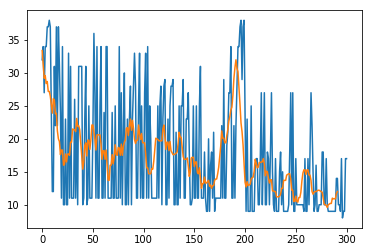

In [553]:
plt.plot(data)
plt.plot(ma_vec)

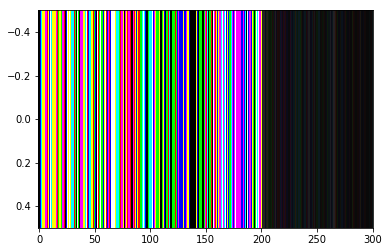

In [554]:
# visualize opened sequence as 2D image
plt.imshow(test_fastq_arr.reshape(1,-1,3), aspect='auto')
#plt.axis('off');

In [555]:
test_fastq_arr[:,63:73]

array([[  0, 255,   0, 255,   0, 255, 255,   0,   0,   0],
       [255,   0,   0, 255,   0, 255,   0,   0,   0, 255],
       [ 34,  34,  11,  11,  11,  11,  24,  11,  11,  25]])

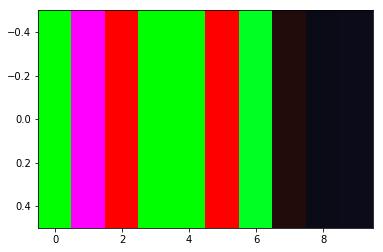

In [556]:
# visualize opened sequence as 2D image
plt.imshow(test_fastq_arr[:,63:73].reshape(1,-1,3), aspect='auto')
#plt.axis('off');

In [557]:
test_fastq_arr[:,:15]

array([[  0,   0,   0,   0,   0,   0,   0,   0, 255,   0, 255, 255, 255, 255,   0],
       [255, 255,   0, 255, 255, 255, 255, 255,   0,   0, 255, 255,   0, 255, 255],
       [ 32,  34,  27,  34,  34,  37,  37,  38,  37,  24,  12,  12,  31,  22,  37]])

In [558]:
test_fastq_arr[:,-15:]

array([[255, 255,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0],
       [  0, 255, 255, 255,   0, 255, 255, 255, 255, 255, 255,   0, 255, 255, 255],
       [  9,   9,   9,   9,  14,  14,  10,  10,   9,  17,   8,   9,   9,  17,  17]])

In [549]:
test_fastq_arr.sum(axis=0)

array([544, 289, 289, 547, ..., 290,  34, 286, 541])

### Setup datasets

In [150]:
# generate sequence array float tensor for every sequence in pandas data frame column Sequences (x data)
x = [tensor(open_seq_array(s)).type(torch.float) for s in seq_df['Sequences'].values]; len(x)

2000

In [151]:
# stack all tensors together in a single tensor
x = torch.stack(x); x.shape
#x = torch.stack(x).view((-1,4,50,1)); x.shape # --> torch.Size([2000, 4, 50, 1])

torch.Size([2000, 2, 50])

In [152]:
# setup target data floar tensor (y data)
y = tensor(targ).view(-1,2).type(torch.float); y # multi-label
#y = tensor(targA).type(torch.float); y # classification with single label

tensor([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [0., 1.],
        [1., 0.],
        [1., 0.]])

In [153]:
# verify total dataset length
len(x), len(y)

(2000, 2000)

In [154]:
# check x and y data
i = 2
x[i], y[i]

(tensor([[1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
          1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
          1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0.],
         [1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
          0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.]]),
 tensor([0., 1.]))

In [155]:
# split dataset into train and valid TensorDataset for NN training
train_ds = TensorDataset(x[:1500],y[:1500])
valid_ds = TensorDataset(x[-500:],y[-500:])

In [156]:
# verify train and valid dataset length
len(train_ds), len(valid_ds)

(1500, 500)

# Model setup

## Basic model for PyTorch training

In [157]:
# set dropout
drop_p = 0.2

In [73]:
# inplace=True seems to generate problems?

In [158]:
net_basic = nn.Sequential(nn.Conv1d(in_channels=2, out_channels=32, kernel_size=12),
                    nn.MaxPool1d(kernel_size=4),
                    Flatten(),
                    nn.Dropout(drop_p),
                    nn.Linear(in_features=288, out_features=16),
                    nn.ReLU(),
                    nn.Dropout(drop_p),
                    nn.Linear(in_features=16, out_features=2),
                    #Debugger() # optional debugger layer
                   )

In [159]:
# check network architecture
net_basic

Sequential(
  (0): Conv1d(2, 32, kernel_size=(12,), stride=(1,))
  (1): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (2): Lambda()
  (3): Dropout(p=0.2)
  (4): Linear(in_features=288, out_features=16, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.2)
  (7): Linear(in_features=16, out_features=2, bias=True)
)

In [160]:
# initialize weights with kaiming normal initialization
apply_init(net_basic, nn.init.kaiming_normal_)

# Model training

## Train basic model with PyTorch

In [161]:
# set batch size
bs = 64

In [162]:
# setup DataLoader for NN training from TensorDatasets for NN training
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=bs*2, shuffle=False)

In [163]:
# set optimizer type, parameters, and hyperparameters
opt = optim.SGD(net_basic.parameters(), lr=1e-3, momentum=0.9)

In [164]:
# training loop extended from https://github.com/fastai/fastai_docs/blob/master/dev_nb/mnist_sample.py


# simple loss function for batch
def simple_loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)


# simple fit function
def simple_fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    
    epoch_list = []
    train_loss_list = []
    valid_loss_list = []
    acc_list = []
    
    print('epoch\ttrain loss\tvalid loss\taccuaracy')
    
    for epoch in range(epochs):
        
        model.train()
        train_losses, train_nums = zip(*[simple_loss_batch(model, loss_func, xb, yb, opt) for xb, yb in train_dl])
        
        # loss calculation for every epoch
        train_loss = np.sum(np.multiply(train_losses, train_nums)) / np.sum(train_nums)
        train_loss_list.append(train_loss)
        
        model.eval()
        with torch.no_grad():
            valid_losses, valid_nums = zip(*[simple_loss_batch(model, loss_func, xb, yb)
                                for xb,yb in valid_dl])
            
            # calculations for accuracy_thres metric:          
            y_hat = [model(xb) for xb, _ in valid_dl]
            y_true = [yb for _, yb in valid_dl]
            
            
        valid_loss = np.sum(np.multiply(valid_losses, valid_nums)) / np.sum(valid_nums)
        acc = accuracy_thresh(torch.cat(y_hat), torch.cat(y_true))
        
        epoch_list.append(epoch)
        valid_loss_list.append(valid_loss)
        acc_list.append(acc)
        
        print(f'{epoch}\t{train_loss:.6f}\t{valid_loss:.6f}\t{acc.detach().item():.3f}')
    
    # print training (https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)
    #pdb.set_trace()
    plt.plot(train_loss_list, label='train loss')
    plt.plot(valid_loss_list, label='valid loss')
    plt.legend()
    plt.show()

In [165]:
simple_fit(100, net_basic, F.binary_cross_entropy_with_logits, opt, train_dl, valid_dl)

epoch	train loss	valid loss	accuaracy
0	0.914847	0.757137	0.471
1	0.712651	0.718304	0.505
2	0.756349	0.698110	0.534
3	0.716703	0.687306	0.567
4	0.648757	0.676231	0.587
5	0.680298	0.668115	0.601
6	0.693048	0.658817	0.625
7	0.597330	0.647218	0.645
8	0.729435	0.638436	0.654
9	0.618382	0.627650	0.684
10	0.702709	0.619542	0.693
11	0.644674	0.609117	0.701
12	0.587816	0.597814	0.711
13	0.609793	0.586585	0.721
14	0.624112	0.579391	0.720
15	0.637745	0.573178	0.724
16	0.617061	0.564633	0.727
17	0.532196	0.555172	0.735
18	0.429336	0.548410	0.740
19	0.617339	0.539820	0.744
20	0.559675	0.532125	0.748
21	0.592692	0.521588	0.758
22	0.559647	0.517640	0.762
23	0.617841	0.514179	0.766
24	0.527613	0.509505	0.769
25	0.483689	0.503663	0.765
26	0.574728	0.491539	0.777
27	0.575641	0.491306	0.770
28	0.436407	0.486290	0.782
29	0.433595	0.478730	0.787
30	0.468482	0.476758	0.777
31	0.514138	0.472830	0.788
32	0.450604	0.467852	0.793
33	0.425677	0.460931	0.795
34	0.446243	0.458324	0.798
35	0.414905	0.453178	0.805
